In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Regression Analysis: Seasonal Effects with Sklearn Linear Regression


In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

cad_jpy_df['Price_Return']=cad_jpy_df['Price'].pct_change()*100
cad_jpy_df.dropna(inplace=True)
cad_jpy_df

,Price,Open,High,Low,Price_Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


In [5]:
price_returns = cad_jpy_df.replace(-np.inf, np.nan).dropna()
price_returns

,Price,Open,High,Low,Price_Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


In [6]:
price_returns['Lagged_Return'] = price_returns.Price_Return.shift()
#price_returns['Price_Difference'] = price_returns.Price_Return.diff()
price_returns.dropna(inplace=True)
price_returns

,Price,Open,High,Low,Price_Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
...,...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756


In [7]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = price_returns[:'2017']
test = price_returns['2018':]

In [8]:
x_train = train['Lagged_Return'].to_frame()
x_test= test['Lagged_Return'].to_frame()
y_train= train ['Price_Return'].to_frame()
y_test = test['Price_Return'].to_frame()

In [9]:
x_train

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
...,...
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#regress = LinearRegression().fit(x_train, y_train)
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
y_test.head()

,Price_Return
Date,
2018-01-01,0.245591
2018-01-02,-0.055679
2018-01-03,0.011142
2018-01-04,0.601604
2018-01-05,0.919158


In [13]:
# Make a prediction of "y" values using just the test dataset
predic = reg.predict(x_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
output= y_test
output

,Price_Return
Date,
2018-01-01,0.245591
2018-01-02,-0.055679
2018-01-03,0.011142
2018-01-04,0.601604
2018-01-05,0.919158
...,...
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508


In [14]:
output['Predicted_Return']=predic
output

,Price_Return,Predicted_Return
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366
...,...,...
2020-05-29,0.076697,0.001846
2020-06-01,1.251756,-0.003024
2020-06-02,1.425508,-0.032890


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

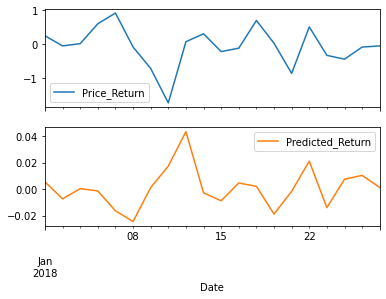

In [15]:
# Plot the first 20 predictions vs the true values
output[:20].plot(subplots=True)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
MSE=mean_squared_error(output['Price_Return'],output['Predicted_Return'])
MSE

0.415484105880405

In [18]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
RMSE=np.sqrt(MSE)
print(f" The Root Mean Squared Error is {RMSE}")

 The Root Mean Squared Error is 0.6445805658569028


In [19]:
# Construct a dataframe using just the "y" training data:
trainoutput=y_train
trainoutput['Train_Predictions'] = reg.predict(x_train)
trainoutput

,Price_Return,Train_Predictions
Date,,
1990-01-04,-1.468476,0.020446
1990-01-05,0.874777,0.036249
1990-01-08,-0.216798,-0.023309
1990-01-09,0.667901,0.004436
1990-01-10,0.567546,-0.018051
...,...,...
2017-12-25,0.033723,-0.000789
2017-12-26,0.269693,-0.001932
2017-12-27,0.392245,-0.007929


In [20]:
MSEtrain=mean_squared_error(trainoutput['Price_Return'],trainoutput['Train_Predictions'])
MSEtrain

0.708954961822499

In [21]:
RMSEtrain=np.sqrt(MSEtrain)
print(f" The In-sample Root Mean Squared Error is {RMSEtrain}")

 The In-sample Root Mean Squared Error is 0.841994632894117
